<a href="https://colab.research.google.com/github/ritikc18/Ritik-s-coding/blob/master/Mushroom_Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mushroom = pd.read_csv('mushrooms.csv')   #mushroom as dataframe df
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
mushroom.shape

(8124, 23)

In [4]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
mush_cap = mushroom['cap-color'].unique()
mush_cap

array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object)

In [8]:
type(mush_cap)

numpy.ndarray

In [9]:
mush_capsize = mushroom.groupby('cap-color',sort = False).size()
mush_capsize

cap-color
n    2284
y    1072
w    1040
g    1840
e    1500
p     144
b     168
u      16
c      44
r      16
dtype: int64

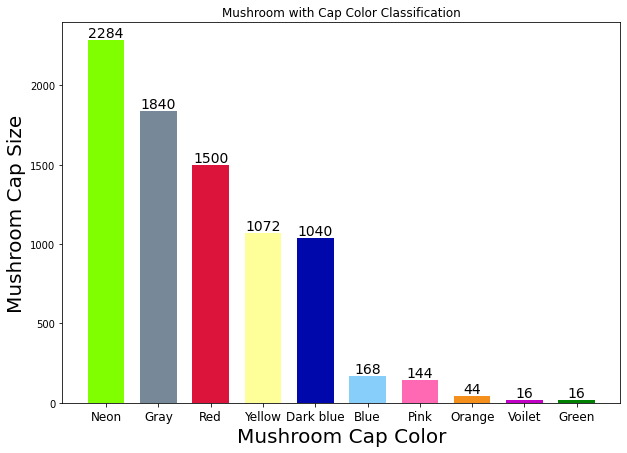

In [10]:
mush_cap = mushroom['cap-color'].value_counts()
m_height = mush_cap.values.tolist() #Provides numerical values
mush_cap.axes #Provides row labels
mush_cap_labels = mush_cap.axes[0].tolist()
arrange = np.arange(10)
width = 0.7
fig,ax = plt.subplots(figsize=(10,7))
colors =['#7FFF00','#778899','#DC143C','#FFFF99',
        '#0008AC','#87CEFA','#FF69B4','#F38F1A','#C000C5','g']
mush_bar = ax.bar(arrange, m_height , width, color=colors)
ax.set_facecolor('w')
ax.set_xlabel('Mushroom Cap Color',fontsize =20)
ax.set_ylabel('Mushroom Cap Size',fontsize =20)
ax.set_title('Mushroom with Cap Color Classification')
ax.set_xticks(arrange)
ax.set_xticklabels(('Neon','Gray','Red','Yellow','Dark blue','Blue','Pink','Orange','Voilet','Green'),fontsize =12)

def autolabel(rects,fontsize=14):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mush_bar)

plt.show()

Cap-Color Column is Response.
Other Columns are Predictors.

In [12]:
x = mushroom.drop('cap-color',axis=1)
y = mushroom['cap-color'] 
x.head()

,class,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [13]:
from sklearn.preprocessing import LabelEncoder
Encoder_x = LabelEncoder() 
for col in x.columns:
    x[col] = Encoder_x.fit_transform(x[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [14]:
x.head()

,class,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [15]:
print(y)

[4 9 8 ... 4 4 4]


In [16]:
x=pd.get_dummies(x,columns=x.columns,drop_first=True)
x.head()

,class_1,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,bruises_1,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8,gill-attachment_1,gill-spacing_1,gill-size_1,gill-color_1,gill-color_2,gill-color_3,gill-color_4,gill-color_5,gill-color_6,gill-color_7,gill-color_8,gill-color_9,gill-color_10,gill-color_11,stalk-shape_1,stalk-root_1,stalk-root_2,stalk-root_3,stalk-root_4,stalk-surface-above-ring_1,stalk-surface-above-ring_2,stalk-surface-above-ring_3,...,stalk-color-above-ring_5,stalk-color-above-ring_6,stalk-color-above-ring_7,stalk-color-above-ring_8,stalk-color-below-ring_1,stalk-color-below-ring_2,stalk-color-below-ring_3,stalk-color-below-ring_4,stalk-color-below-ring_5,stalk-color-below-ring_6,stalk-color-below-ring_7,stalk-color-below-ring_8,veil-color_1,veil-color_2,veil-color_3,ring-number_1,ring-number_2,ring-type_1,ring-type_2,ring-type_3,ring-type_4,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,spore-print-color_5,spore-print-color_6,spore-print-color_7,spore-print-color_8,population_1,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [17]:
y

array([4, 9, 8, ..., 4, 4, 4])

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                      test_size=0.3, random_state=0)

In [19]:
print(x_train.shape)
print(x_test.shape) #75:25

(5686, 87)
(2438, 87)


In [20]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [21]:
x_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 66 )
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([4, 2, 8, ..., 2, 4, 2])

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)*100    #use noramlization to increase accuracy

37.57178014766202

In [24]:
confusion_matrix(y_pred,y_test) #daigonal part is true

array([[  5,   0,   2,   2,   2,   2,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   0, 169,  60, 220,   9,   0,   0,   0,   0],
       [ 26,   0,  76, 258, 112,   9,   1,   1, 114, 165],
       [  2,   9, 204, 101, 290,   7,   2,   4,  62,  15],
       [  0,   0,   0,  13,   1,   2,   0,   0,  13,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 14,   0,   0,  21,  20,  13,   1,   1,  92,  71],
       [  0,   0,   0,  67,  27,   0,   0,   0,  42, 100]])

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.09      0.36      0.14        14
           1       0.00      0.00      0.00         0
           2       0.37      0.36      0.37       468
           3       0.49      0.34      0.40       762
           4       0.43      0.42      0.42       696
           5       0.05      0.07      0.06        29
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.28      0.39      0.33       233
           9       0.28      0.42      0.34       236

    accuracy                           0.38      2438
   macro avg       0.20      0.24      0.21      2438
weighted avg       0.41      0.38      0.38      2438



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


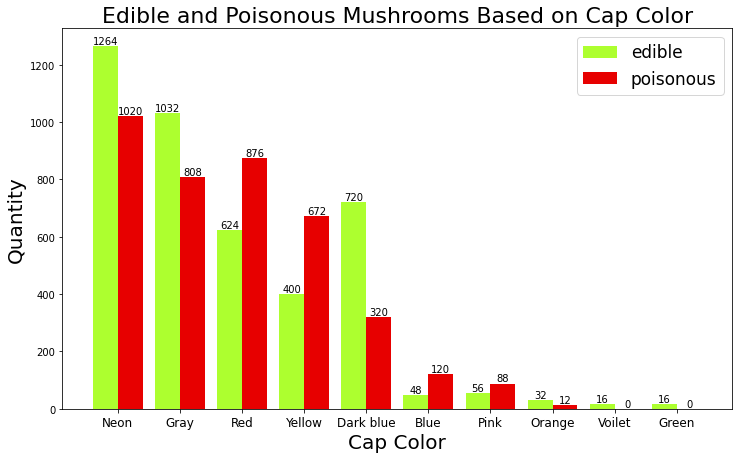

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [40]:
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in mush_cap_labels:
    size = len(mushroom[mushroom['cap-color'] == capColor].index)
    edibles = len(mushroom[(mushroom['cap-color'] == capColor) & (mushroom['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(arrange, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(arrange+width, poisonous_cc , width, color='#E70000')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(arrange + width / 2) #Positioning on the x axis
ax.set_xticklabels(('Neon','Gray','Red','Yellow','Dark blue','Blue','Pink','Orange','Voilet','Green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_cc)
print(poisonous_cc)

Class Column is Response.
Other Columns are Predictors.

In [26]:
x = mushroom.drop('class',axis=1)
y = mushroom['class'] 
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [27]:
from sklearn.preprocessing import LabelEncoder
Encoder_x = LabelEncoder() 
for col in x.columns:
    x[col] = Encoder_x.fit_transform(x[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [28]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [29]:
print(y)

[1 0 0 ... 0 1 0]


In [30]:
x=pd.get_dummies(x,columns=x.columns,drop_first=True)
x.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,cap-color_3,cap-color_4,cap-color_5,cap-color_6,cap-color_7,cap-color_8,cap-color_9,bruises_1,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8,gill-attachment_1,gill-spacing_1,gill-size_1,gill-color_1,gill-color_2,gill-color_3,gill-color_4,gill-color_5,gill-color_6,gill-color_7,gill-color_8,gill-color_9,gill-color_10,gill-color_11,...,stalk-color-above-ring_5,stalk-color-above-ring_6,stalk-color-above-ring_7,stalk-color-above-ring_8,stalk-color-below-ring_1,stalk-color-below-ring_2,stalk-color-below-ring_3,stalk-color-below-ring_4,stalk-color-below-ring_5,stalk-color-below-ring_6,stalk-color-below-ring_7,stalk-color-below-ring_8,veil-color_1,veil-color_2,veil-color_3,ring-number_1,ring-number_2,ring-type_1,ring-type_2,ring-type_3,ring-type_4,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,spore-print-color_5,spore-print-color_6,spore-print-color_7,spore-print-color_8,population_1,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                      test_size=0.3, random_state=0)

In [33]:
print(x_train.shape)
print(x_test.shape) #75:25

(5686, 95)
(2438, 95)


In [34]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [35]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 66 )
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)*100    #use noramlization to increase accuracy

99.75389663658737

In [38]:
confusion_matrix(y_pred,y_test) #daigonal part is true

array([[1272,    6],
       [   0, 1160]])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1278
           1       0.99      1.00      1.00      1160

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

